In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
matches = pd.read_csv('matches.csv')
batting_stats = pd.read_csv('most_runs_average_strikerate.csv')

In [9]:
print("Matches DataSet:")
print(matches.shape)
matches.head()

Matches DataSet:
(756, 18)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [29]:
print("\nBatting Stats Dataset:")
print(batting_stats.shape)
print(batting_stats.head())


Batting Stats Dataset:
(516, 6)
     batsman  total_runs  out  numberofballs    average  strikerate
0    V Kohli        5426  152           4111  35.697368  131.987351
1   SK Raina        5386  160           3916  33.662500  137.538304
2  RG Sharma        4902  161           3742  30.447205  130.999466
3  DA Warner        4717  114           3292  41.377193  143.286756
4   S Dhawan        4601  137           3665  33.583942  125.538881


In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [30]:
batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


# Data Cleaning

In [31]:
print("Missing values in matches:")
print(matches.isnull().sum())

Missing values in matches:
id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [32]:
print("\nMissing values in batting stats:")
print(batting_stats.isnull().sum())


Missing values in batting stats:
batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64


In [33]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Data Types and Fixes

In [35]:
print(matches['date'].head(10))


0   2017-04-05
1   2017-04-06
2   2017-04-07
3   2017-04-08
4   2017-04-08
5   2017-04-09
6   2017-04-09
7   2017-04-10
8   2017-04-11
9   2017-04-12
Name: date, dtype: datetime64[ns]


In [36]:
# Strip spaces and force parsing
matches['date'] = matches['date'].astype(str).str.strip()  # Remove leading/trailing spaces

# Convert with dayfirst and errors='coerce' (converts bad entries to NaT)
matches['date'] = pd.to_datetime(matches['date'], dayfirst=True, errors='coerce')

# Check how many dates failed
print("Unparsed dates (NaT):", matches['date'].isna().sum())


Unparsed dates (NaT): 474


In [37]:
print(matches[matches['date'].isna()])


        id    season       city date                        team1  \
10      11  IPL-2017    Kolkata  NaT              Kings XI Punjab   
11      12  IPL-2017  Bangalore  NaT  Royal Challengers Bangalore   
12      13  IPL-2017     Rajkot  NaT       Rising Pune Supergiant   
13      14  IPL-2017    Kolkata  NaT        Kolkata Knight Riders   
14      15  IPL-2017      Delhi  NaT             Delhi Daredevils   
..     ...       ...        ...  ...                          ...   
740  11336  IPL-2019     Jaipur  NaT          Sunrisers Hyderabad   
741  11337  IPL-2019      Delhi  NaT               Delhi Capitals   
742  11338  IPL-2019    Kolkata  NaT        Kolkata Knight Riders   
743  11339  IPL-2019  Hyderabad  NaT          Sunrisers Hyderabad   
744  11340  IPL-2019  Bengaluru  NaT  Royal Challengers Bangalore   

                           team2            toss_winner toss_decision  \
10         Kolkata Knight Riders  Kolkata Knight Riders         field   
11                Mumbai 

In [39]:
matches.dropna(subset=['date'], inplace=True)

In [40]:
# Fill with a placeholder (e.g., first valid date)
matches['date'].fillna(matches['date'].min(), inplace=True)


C:\Users\prita\AppData\Local\Temp\ipykernel_17824\247321137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['date'].fillna(matches['date'].min(), inplace=True)


In [42]:
matches.head()
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               282 non-null    int64         
 1   season           282 non-null    object        
 2   city             282 non-null    object        
 3   date             282 non-null    datetime64[ns]
 4   team1            282 non-null    object        
 5   team2            282 non-null    object        
 6   toss_winner      282 non-null    object        
 7   toss_decision    282 non-null    object        
 8   result           282 non-null    object        
 9   dl_applied       282 non-null    int64         
 10  winner           282 non-null    object        
 11  win_by_runs      282 non-null    int64         
 12  win_by_wickets   282 non-null    int64         
 13  player_of_match  282 non-null    object        
 14  venue            282 non-null    object        

# Remove Duplicates

In [43]:
matches.drop_duplicates(inplace=True)
batting_stats.drop_duplicates(inplace=True)


# Matches Played Per Season

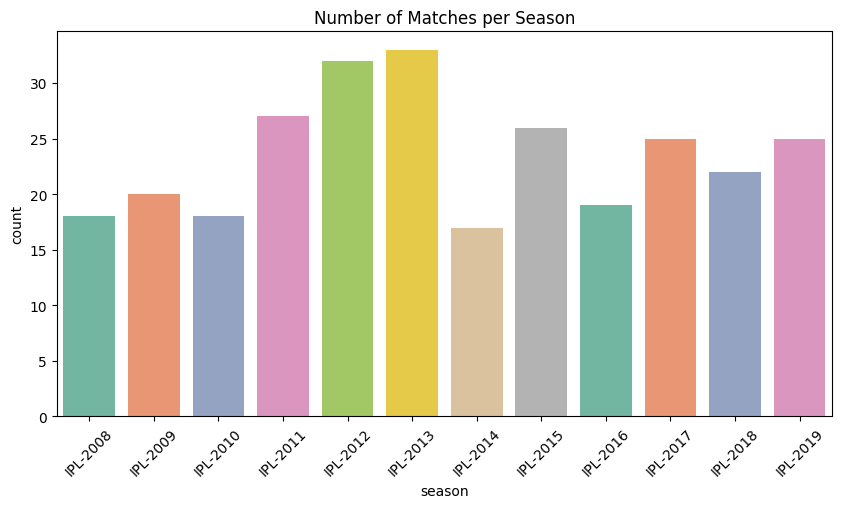

In [51]:
if 'season' in matches.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x ='season', data = matches.sort_values(by='date'), palette='Set2', hue ='season')
    plt.title("Number of Matches per Season")
    plt.xticks(rotation = 45)
    plt.show()

# Most Succesful Teams

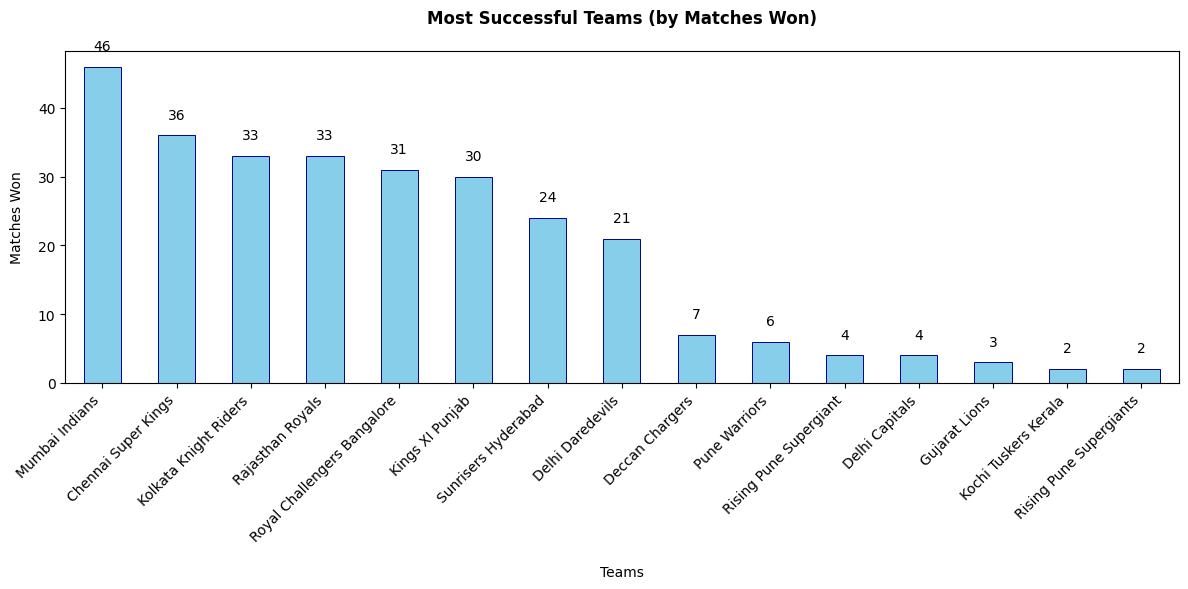

In [55]:
if 'winner' in matches.columns:
    plt.figure(figsize=(12, 6))
    wins = matches['winner'].value_counts()
    

    wins.plot(kind='bar', 
             color='skyblue',
             edgecolor='darkblue',
             linewidth=0.7)
    
    plt.title("Most Successful Teams (by Matches Won)", 
              pad=20, 
              fontweight='bold')
    plt.xlabel("Teams", labelpad=15)
    plt.ylabel("Matches Won", labelpad=10)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of bars
    for i, v in enumerate(wins):
        plt.text(i, v + 2, str(v), 
                ha='center', 
                va='bottom',
                fontsize=10)
    
  
    plt.tight_layout()
    plt.show()

# Top Batsmen by Average

In [62]:
batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


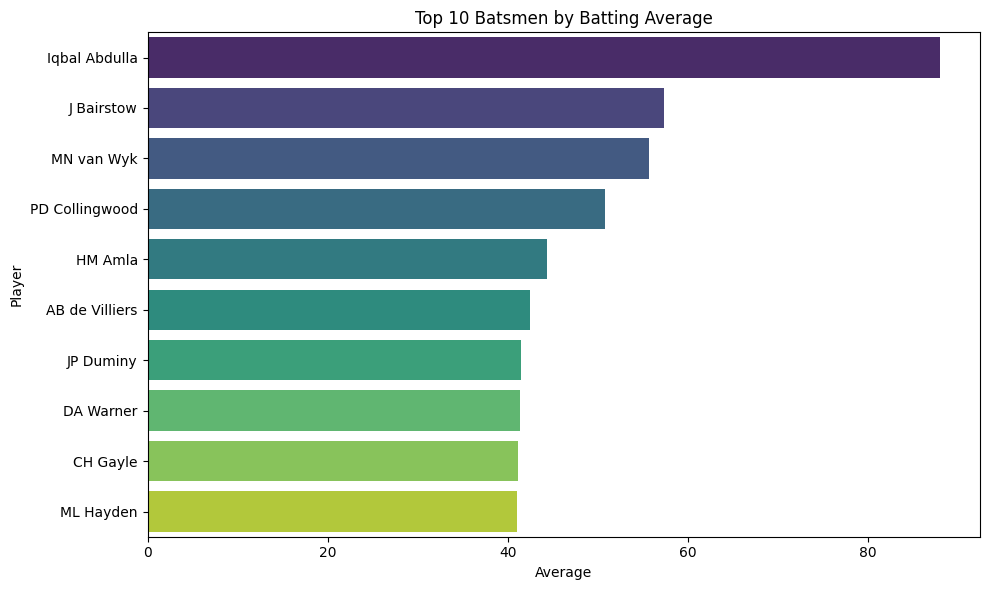

In [67]:

batting_stats['average'] = pd.to_numeric(batting_stats['average'], errors='coerce')
top_avg = batting_stats.sort_values(by='average', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='average', y='batsman', data=top_avg, palette='viridis',hue='batsman')
plt.title("Top 10 Batsmen by Batting Average")
plt.xlabel("Average")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


# Top Batsmen by strike rate

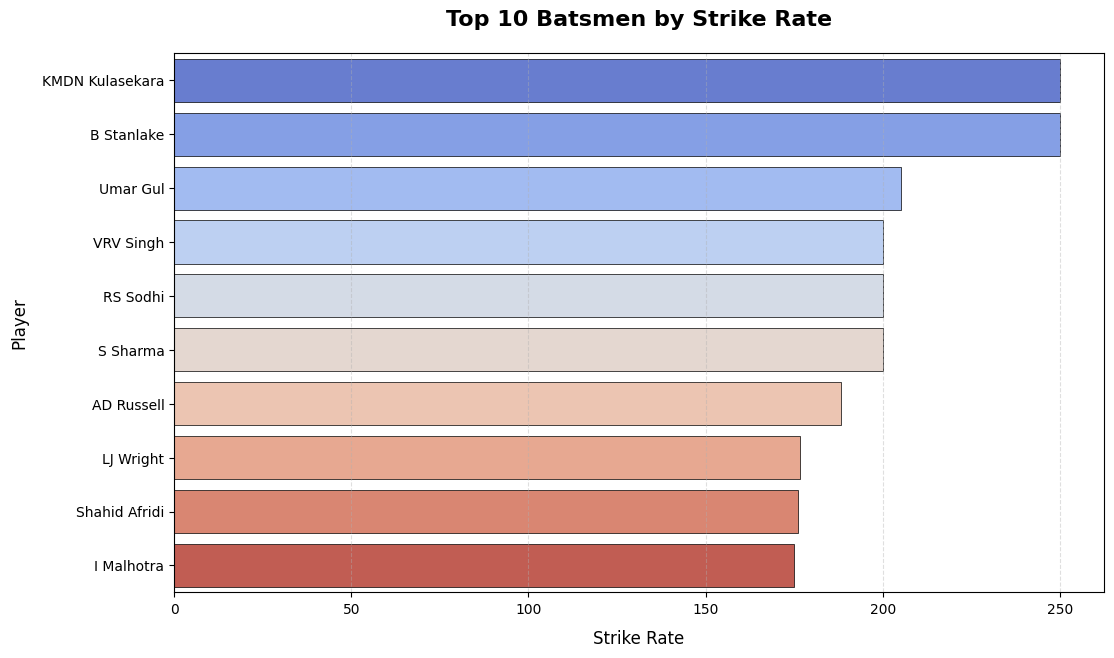

In [73]:


top_str = batting_stats.sort_values(by='strikerate', ascending=False).head(10)
# Create visualization
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='strikerate',
                 y='batsman',
                 data=top_str,
                 palette='coolwarm',
                 edgecolor='black',
                 linewidth=0.5,
                hue ='batsman')
# Add title and labels with improved formatting
plt.title("Top 10 Batsmen by Strike Rate", 
          fontsize=16, 
          pad=20,
          fontweight='bold')
plt.xlabel("Strike Rate", 
           fontsize=12,
           labelpad=10)
plt.ylabel("Player", 
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)
plt.show()

#  Correlation Matrix (Numerical Insights)

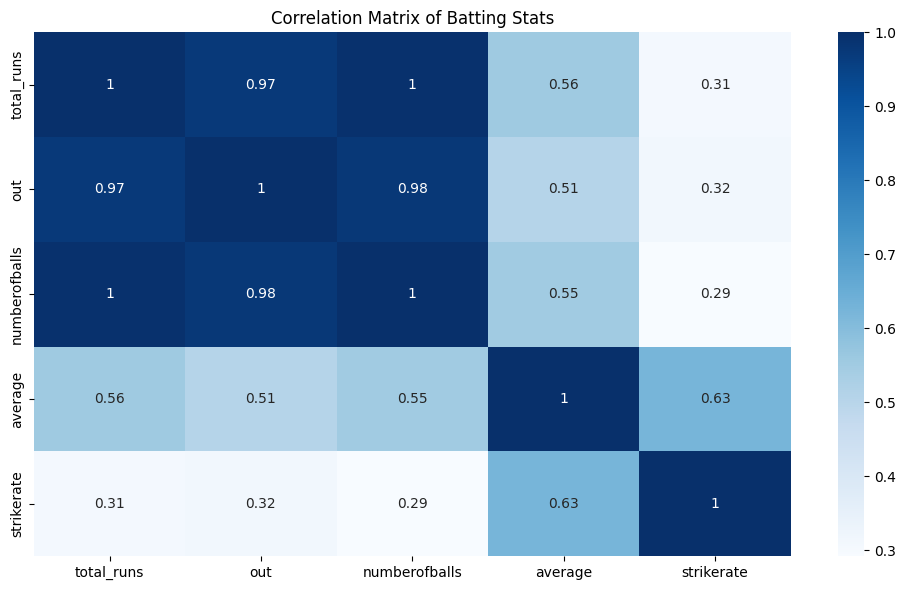

In [74]:

numeric_data = batting_stats.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix of Batting Stats")
plt.tight_layout()
plt.show()


# Matches Played by Each Team

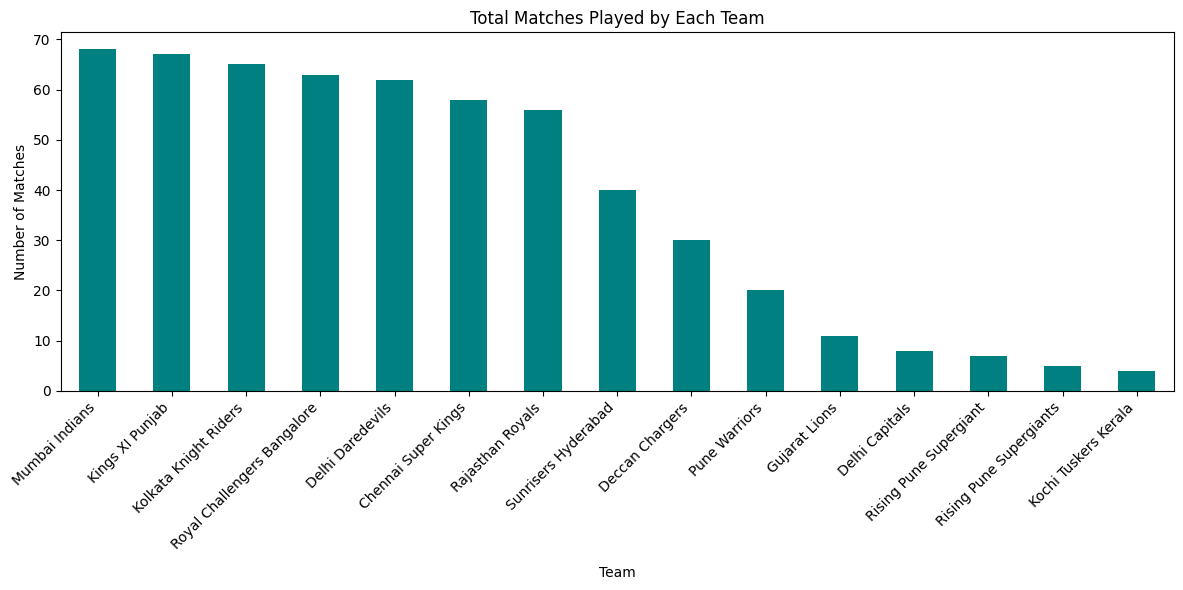

In [81]:
teams = pd.concat([matches['team1'], matches['team2']])
team_match_counts = teams.value_counts()

plt.figure(figsize=(12,6))
team_match_counts.plot(kind='bar', color='teal')
plt.title("Total Matches Played by Each Team")
plt.xlabel("Team" , labelpad=10)
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Top Run Scorers

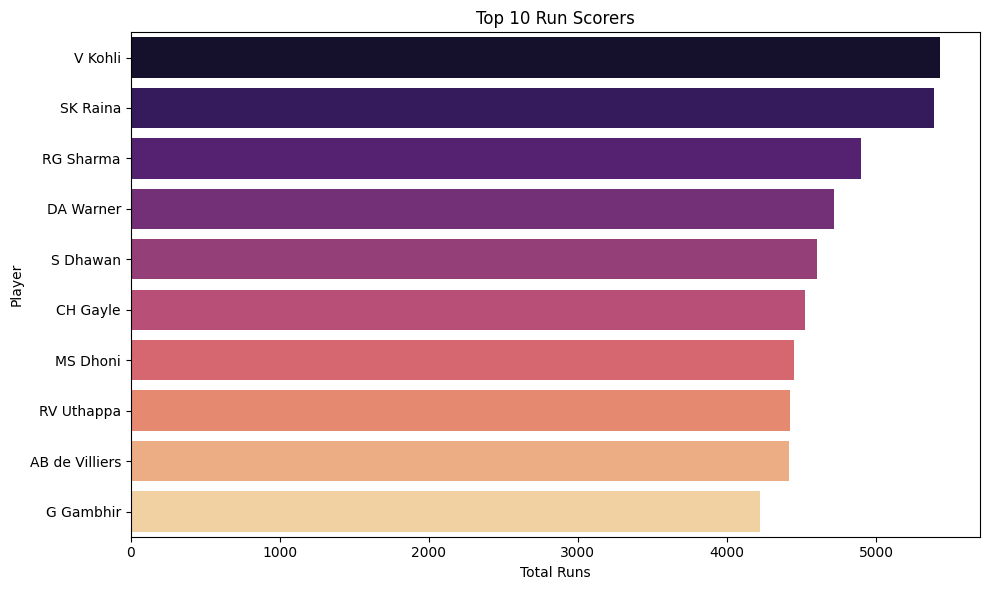

In [92]:
batting_stats['total_runs'] = pd.to_numeric(batting_stats['total_runs'], errors='coerce')
top_runs = batting_stats.sort_values(by='total_runs', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='total_runs', y='batsman', data=top_runs, palette='magma', hue ='batsman')
plt.title("Top 10 Run Scorers")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


# Strike Rate vs Average Bubble Chart

In [93]:
batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


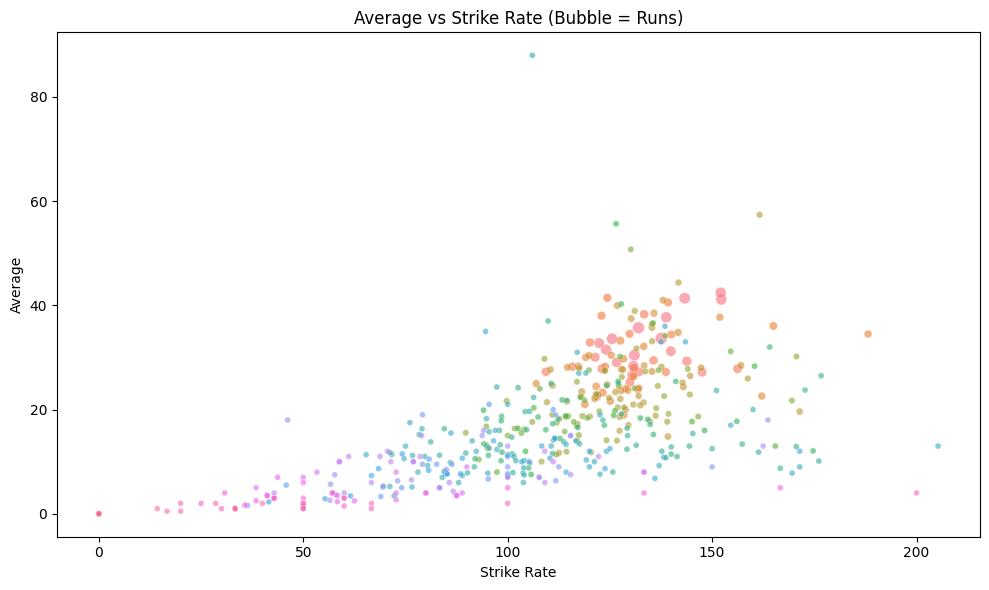

In [95]:
batting_stats['strikerate'] = pd.to_numeric(batting_stats['strikerate'], errors='coerce')
batting_stats['average'] = pd.to_numeric(batting_stats['average'], errors='coerce')

plt.figure(figsize=(10,6))
sns.scatterplot(data=batting_stats, x='strikerate', y='average', size='total_runs', hue='batsman', legend=False, alpha=0.6)
plt.title("Average vs Strike Rate (Bubble = Runs)")
plt.xlabel("Strike Rate")
plt.ylabel("Average")
plt.tight_layout()
plt.show()


#  Team Dominance by Season (Heatmap)

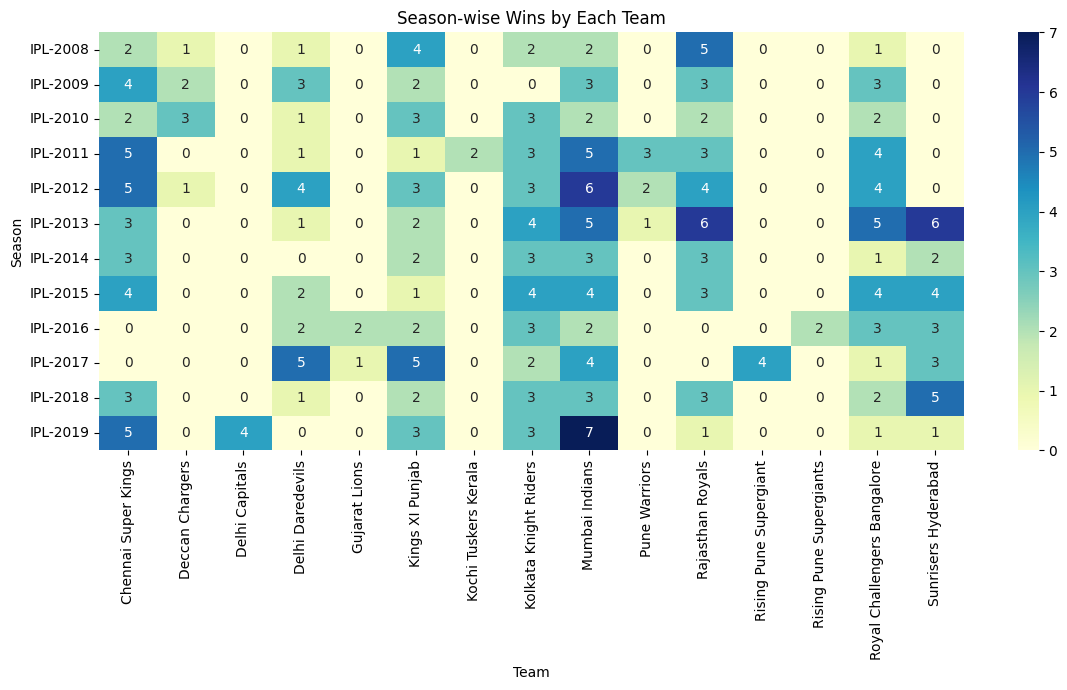

In [96]:
dominance = matches.pivot_table(index='season', columns='winner', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,7))
sns.heatmap(dominance, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Season-wise Wins by Each Team")
plt.ylabel("Season")
plt.xlabel("Team")
plt.tight_layout()
plt.show()
